In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/BigData/classificacao_cachorro_gato.xlsx", sheet_name=1, nrows=10)

In [ ]:
df.head()

,tem_pelos,tem_perna_curta,tem_focinho_grande,tem_rosto_redondo,abana_o_rabo,sobe_em_arvore,eh_um_gato
0,1,1,0,1,1,1,1
1,1,1,0,1,0,1,1
2,0,1,0,0,0,1,1
3,1,1,1,0,1,0,0
4,1,0,1,0,1,0,0


In [ ]:
x = df.drop("eh_um_gato", axis="columns")
x

,tem_pelos,tem_perna_curta,tem_focinho_grande,tem_rosto_redondo,abana_o_rabo,sobe_em_arvore
0,1,1,0,1,1,1
1,1,1,0,1,0,1
2,0,1,0,0,0,1
3,1,1,1,0,1,0
4,1,0,1,0,1,0
5,1,0,1,0,1,0
6,1,0,0,1,0,1
7,1,1,0,1,1,0
8,1,1,0,1,1,0
9,1,0,0,0,1,0


In [ ]:
y = df['eh_um_gato']

In [ ]:
y

0    1
1    1
2    1
3    0
4    0
5    0
6    1
7    0
8    0
9    1
Name: eh_um_gato, dtype: int64

#Treinando o modelo

In [ ]:
from sklearn import tree

In [ ]:
dt = tree.DecisionTreeClassifier()

In [ ]:
dt

DecisionTreeClassifier()

In [ ]:
dt.fit(x,y)

DecisionTreeClassifier()

In [ ]:
dt.predict(x)

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
x.shape

(10, 6)

In [ ]:
df['resposta']= dt.predict(x)

In [ ]:
df.head()

,tem_pelos,tem_perna_curta,tem_focinho_grande,tem_rosto_redondo,abana_o_rabo,sobe_em_arvore,eh_um_gato,resposta
0,1,1,0,1,1,1,1,1
1,1,1,0,1,0,1,1,1
2,0,1,0,0,0,1,1,1
3,1,1,1,0,1,0,0,0
4,1,0,1,0,1,0,0,0


In [ ]:
df['resposta_probabilidade']= dt.predict_proba(x)[:,1]

In [ ]:
df.head()

,tem_pelos,tem_perna_curta,tem_focinho_grande,tem_rosto_redondo,abana_o_rabo,sobe_em_arvore,eh_um_gato,resposta,resposta_probabilidade
0,1,1,0,1,1,1,1,1,1.0
1,1,1,0,1,0,1,1,1,1.0
2,0,1,0,0,0,1,1,1,1.0
3,1,1,1,0,1,0,0,0,0.0
4,1,0,1,0,1,0,0,0,0.0


In [ ]:
tree.export_graphviz(dt,feature_names=x.columns,class_names=["cachorro","gato"],
                     rounded=True,out_file="tree.dot")

In [ ]:
!dot -Tpng tree.dot -o tree.png

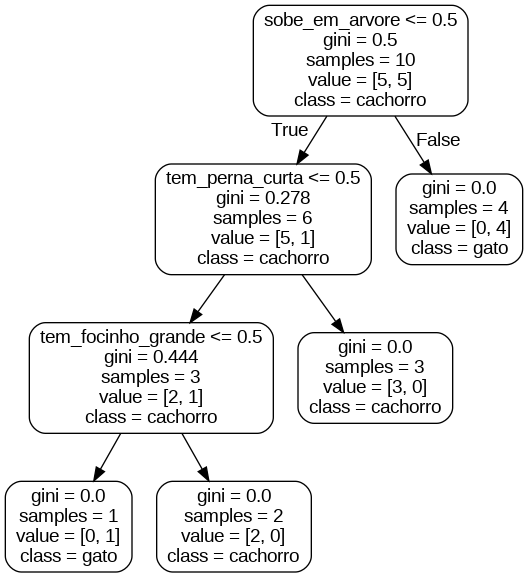

In [ ]:
from IPython.display import Image

Image("tree.png")

#Prevendo novos Eventos

In [ ]:
df_new=pd.read_excel("/content/drive/MyDrive/BigData/classificacao_cachorro_gato.xlsx", sheet_name=2)

In [ ]:
df_new

,Exemplo,tem_pelos,tem_perna_curta,tem_focinho_grande,tem_rosto_redondo,abana_o_rabo,sobe_em_arvore
0,NaN,0,0,0,1,0,1


In [ ]:
df_new = df_new.drop("Exemplo", axis= "columns")

In [ ]:
df_new

,tem_pelos,tem_perna_curta,tem_focinho_grande,tem_rosto_redondo,abana_o_rabo,sobe_em_arvore
0,0,0,0,1,0,1


In [ ]:
dt.predict(df_new)

array([1])

In [ ]:
df_new["previsão"]= dt.predict(df_new)

In [ ]:
df_new.head()

,tem_pelos,tem_perna_curta,tem_focinho_grande,tem_rosto_redondo,abana_o_rabo,sobe_em_arvore,previsão
0,0,0,0,1,0,1,1
